# Your data.

Your data comes in various flavors. However, mostly you may have a list of numbers, like concentrations, O.D., Voltage, cell count, etc. And normally, you would like to get the most out of it. Let's have an example.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
data_list = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

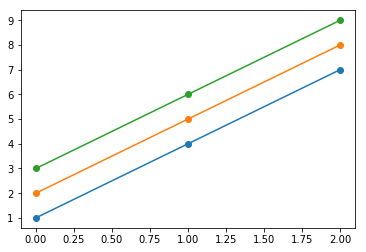

In [211]:
plt.plot(data_list, 'o-');

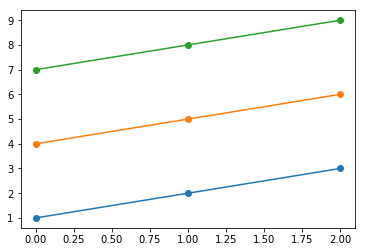

In [212]:
for i in data_list:
    plt.plot(i,'o-')

It would be so good just to __transpose__ the list. See how much effort this is:

In [213]:
data_list_transposed = [list(i) for i in zip(*data_list)]

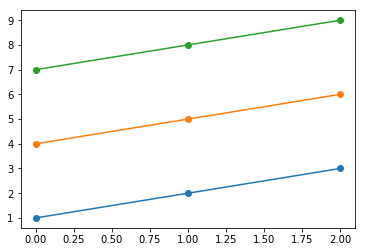

In [216]:
plt.plot(data_list_transposed, 'o-');

Let's get in touch with __numpy__

In [217]:
import numpy as np

We create a numpy array. Note, that `np` is the common abbreviation

In [221]:
data_np = np.array(data_list)

In [222]:
data_np

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Indexing is superior to lists

In [220]:
data_list[1][2]

6

In [262]:
data_np[1,2]

6

In [240]:
data_np[:,2]

array([3, 6, 9])

In [243]:
print([i[2] for i in data_list])

[3, 6, 9]


And if we think of our plotting example, the transpose is just `.T`

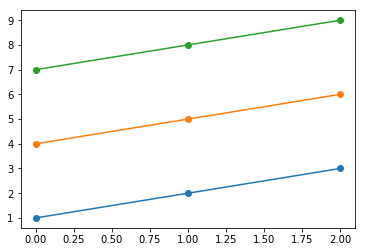

In [263]:
plt.plot(data_np.T, 'o-');

## Interpolating data to use them in numpy

In [338]:
uneven_data = [list(np.arange(0,100, np.ceil(np.random.random(1)*10), dtype=int)) for _ in range(10)]

In [345]:
even_data = np.empty((len(uneven_data),20))

for i, ue in enumerate(uneven_data):
    print(len(ue))
    even_data[i] = np.interp(np.arange(20), ue, ue)

20
34
20
17
25
25
12
50
34
34


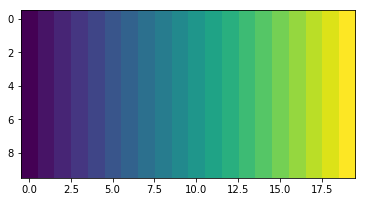

In [346]:
plt.imshow(even_data)

## Programming is just faster

In [390]:
q = np.arange(100).reshape((10,-1))

In [391]:
q

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [402]:
# Use in-built functions for often used computations:
q.std() # standard deviation
q.mean()
q.sum()
q.cumsum() # cumulative sum
q.min(), q.max()

# and remember, you can pass a desired axis!

(-1, 99)

In [403]:
print('min in array', q.min())
print('min along axis=0', q.min(0))
print('min along axis=1', q.min(1))

min in array -1
min along axis=0 [ 0  1  2  3 -1  5 -1  7  8  9]
min along axis=1 [ 0 10 20 -1 -1 -1 -1 70 80 90]


Easy way to compute histogram and cumulative distribution

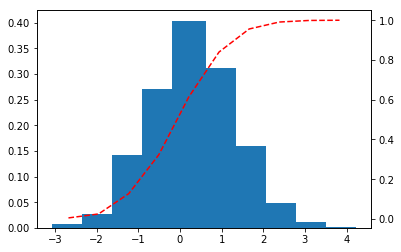

In [434]:
q, h = np.histogram(np.random.randn((1000)), normed=1)
ax = plt.subplot(111)
ax.bar(h[1:], q, label='histogram')


ax2 = ax.twinx()
ax2.plot(h[1:], q.cumsum()/q.cumsum().max(),'r--', label='cumulative')


Use views to access a subset of data, process it and update the original one.

In [398]:
view = q[3:7, 4:8]

In [399]:
view[view%2==0] = -1

In [400]:
view

array([[-1, 35, -1, 37],
       [-1, 45, -1, 47],
       [-1, 55, -1, 57],
       [-1, 65, -1, 67]])

In [401]:
q

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, -1, 35, -1, 37, 38, 39],
       [40, 41, 42, 43, -1, 45, -1, 47, 48, 49],
       [50, 51, 52, 53, -1, 55, -1, 57, 58, 59],
       [60, 61, 62, 63, -1, 65, -1, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

## Getting rid of noise

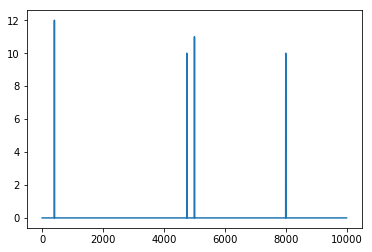

In [605]:
signal = np.zeros((10000))
signal[400:403] = 12
signal[4750] = 10
signal[5000:5005] = 11
signal[8000:8003] = 10
plt.plot(signal)

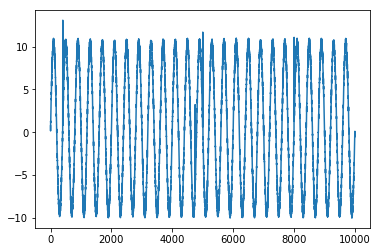

In [589]:
acq = signal+np.random.random((10000))+np.sin(np.arange((10000))*.005*np.pi)*10
plt.plot(acq)

In [599]:
W = np.fft.rfftfreq(acq.size)

In [600]:
fft = np.fft.rfft(acq)

C:\Users\anki\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


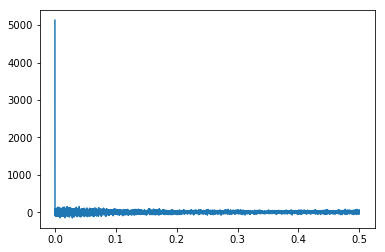

In [601]:
plt.plot(W, fft)

In [602]:
fft[(W<.01)]=0

In [603]:
acq_cleaned = np.fft.irfft(fft)

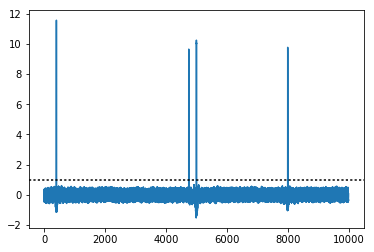

In [604]:
plt.plot(acq_cleaned)
plt.axhline(1,ls=':', color='k')

In [592]:
np.where(acq_cleaned > 1)

(array([ 400,  401,  402, 4750, 5000, 5001, 5002, 5003, 5004, 8000, 8001,
        8002], dtype=int64),)

## Convolution

(De)convolution is important in (functional) imaging, regression, neural networks, and (auto)correlation

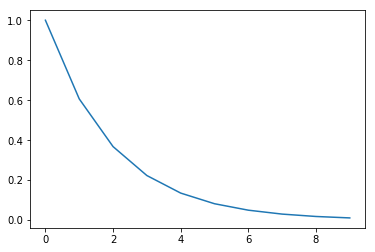

In [354]:
kernel = np.exp(-.5 * np.arange(10))
plt.plot(kernel)

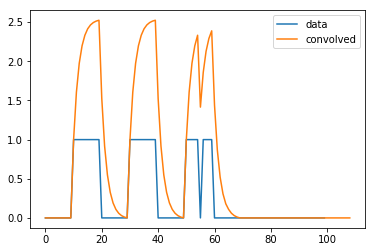

In [356]:
data = np.zeros(100)
data[10:20] = 1
data[30:40] = 1
data[50:55] = 1
data[56:60] = 1
plt.plot(data, label='data')
plt.plot(np.convolve(data,kernel),label='convolved')
plt.legend()

## Basic image processing with numpy

Multi-view maximum intensity projection

In [274]:
from skimage.external.tifffile import imread

In [275]:
im = imread(r"C:\Users\anki\Downloads\fish_cb.tif")

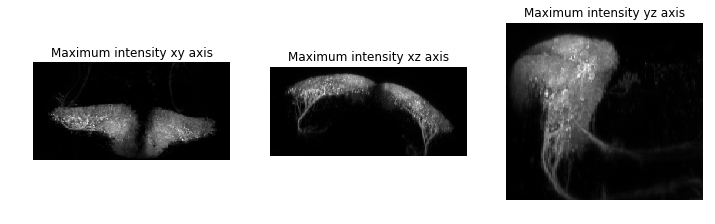

In [292]:
aspect = [1, 1/1.3893, 1/1.3893]
title = ['xy','xz','yz']
plt.figure(figsize=(12,5))

for i in range(3):
    plt.subplot(131+i)
    plt.imshow(im.max(i)[::-1], aspect=aspect[i], cmap='gray')
    plt.axis('off')
    plt.title('Maximum intensity {} axis'.format(title[i]))

Thresholding

In [288]:
from ipywidgets import interact

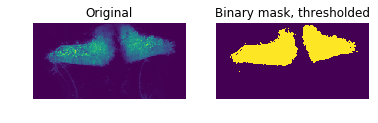

In [584]:
@interact
def doThreshold(threshold:(0,255)=27):
    plt.subplot(121)
    plt.imshow(im.max(0))
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(im.max(0)>threshold)
    plt.title('Binary mask, thresholded')
    plt.axis('off')

Resampling

In [294]:
from skimage.data import astronaut

In [295]:
a = astronaut()

In [309]:
print("Original:  ", a.shape)
a_gray = a.mean(2)
print("Grayscale: ", a_gray.shape)
a_gray_resampled = a_gray.reshape((64,8,64,8)).mean((1,3))
print("Resampled: ", a_gray_resampled.shape)

Original:   (512, 512, 3)
Grayscale:  (512, 512)
Resampled:  (64, 64)


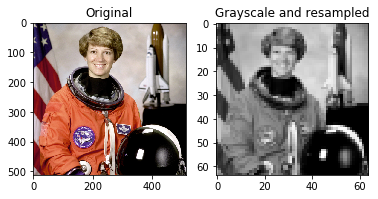

In [311]:
plt.subplot(121)
plt.imshow(a)
plt.title('Original')

plt.subplot(122)
plt.imshow(a_gray_resampled, cmap='gray')
plt.title('Grayscale and resampled')

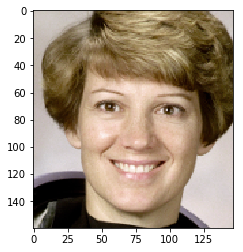

In [581]:
the_head_as_view = a[30:190,147:294]
plt.imshow(the_head_as_view);

## Sometimes lists are superior

When you add dynamically data and extend the list with another level, it is way faster than numpy due to its in-built logic.

In [184]:
def acquire_list(r=10000):
    data = []
    t = []
    
    
    for i in range(r):
        data.append(list(range(10)))
        t.append(time())
        
    return np.diff(np.array(t))

def acquire_np(r=10000):
    data = np.empty(10)
    t = []
    
    
    for i in range(r):
        data = np.vstack((data, np.arange(10)))
        t.append(time())
        
    return np.diff(np.array(t))

In [185]:
%timeit acquire_list()

100 loops, best of 3: 8.13 ms per loop


In [186]:
%timeit acquire_np()

1 loop, best of 3: 231 ms per loop


In [191]:
l = acquire_list(200000)
n = acquire_np(200000)

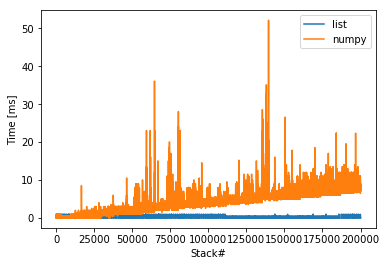

In [264]:
plt.plot([i for i in l if i < .04], label='list')
plt.plot(n, label='numpy')
plt.legend()
plt.xlabel('Stack#')
plt.ylabel('Time [ms]')
plt.yticks(np.arange(6)*.01, np.arange(6)*10);